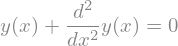

In [1]:
# Solution of the DE y''+y = 0 with the initial conditions y(0)=1, y’(0)=0
%matplotlib inline
import sympy as sy
sy.init_printing() # for LaTeX formatted output
from IPython.display import display
x = sy.symbols('x'); y = sy.symbols('y', cls=sy.Function)
#Enter the differential equation (DE): y’’+y=0
a2=1; a1=0;a0=1;r=0
DE = sy.Eq(a2*y(x).diff(x, x) - a1*y(x).diff(x) + a0*y(x), r)
# Print the DE
display(DE)
# Solve the DE
sol = sy.dsolve(DE,y(x))
# Print the solution
display(sol)
# Solving C1 and C2 from the intial conditions y(0)=1, y’(0)=0
constants = sy.solve([sol.rhs.subs(x,0) - 1, sol.rhs.diff(x,1).subs(x,0)- 0])
display(constants)
# Final solution
C1, C2 = sy.symbols('C1,C2')
fsol = sol.subs(constants)
display(fsol)

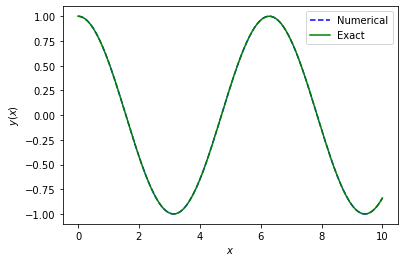

In [2]:
# Exact and numerical solutions of the DE y''+y = 0 with the initial conditions y(0)=1, y’(0)=0
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def dydx(v, x):
# let y’=z so that given DE reduces to the system: y’=z and z’= -(a1/a2)*z- (a0/a2)*y +
    y, z = v
    a2=1; a1=0;a0=1;r=0
    return [z, -(a1/a2)*z- (a0/a2)*y + r/a2]
x = np.linspace(0, 10, 200)
w = odeint(dydx, [1,0], x) # Here [1,0] stands for the IC [y(0),y’(0)]=[1,0]
y = w[:,0] # y’ = w[:,1]
# plot results
plt.plot(x,y,'b--',label='Numerical')
plt.plot(x,np.cos(x),'g',label='Exact')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.show()